### Olympics Games Data Analysis (Athens 1896 to Rio 2016)

Analyzing Olympics games historical dataset, including all the Games from Athens 1896 to Rio 2016.

In [4]:
import pandas as pd

df = pd.read_csv('data/olympics_athlete_events.csv')

In [224]:
df.head()
# df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [209]:
#df.describe() # Descriptive statistics of data frame.

#df.head(3) # Return top five rows by default. 

#df.tail() # Return buttom five rows by default. 

#df.info() # Return the info of your dataframe

# df.Team.value_counts() # Returns count of an object containg unique values.  

#df.Event.value_counts(ascending=True) # Returns count of an object containg unique values in sorted order. 

#df.sort_values(['Year', 'Name']) # Sort values along either axis.
#df.sort_values(by=['TransactionDate', 'Symbol'], ascending=False)

In [225]:
dfIndia = df[(df.NOC == "IND")].sort_values(by=['Year', 'Name'], ascending=False)

dfIndia.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
60362,30913,Yogeshwar Dutt,M,33.0,168.0,65.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Welterweight, Freestyle",NaN
188151,94516,Vinesh Phogat,F,21.0,165.0,56.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Women's Flyweight, Freestyle",NaN
82940,42127,Vikas Shive Gowda,M,33.0,190.0,110.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Discus Throw,NaN
264077,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN
114449,57956,Vandana Katariya,F,24.0,159.0,48.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Hockey,Hockey Women's Hockey,NaN


In [230]:
dfIndMedals = dfIndia.loc[~ dfIndia.Medal.isnull()].groupby(["Year", "Games", "Sport", "Event", "Medal"]).agg({'Age' : ['min','max','count']})

dfIndMedals.head()


Age  \
                                                                       min   
Year Games       Sport     Event                              Medal          
1900 1900 Summer Athletics Athletics Men's 200 metres         Silver  24.0   
                           Athletics Men's 200 metres Hurdles Silver  24.0   
1924 1924 Winter Alpinism  Alpinism Mixed Alpinism            Gold     NaN   
1928 1928 Summer Hockey    Hockey Men's Hockey                Gold    21.0   
1932 1932 Summer Hockey    Hockey Men's Hockey                Gold    21.0   

                                                                            \
                                                                       max   
Year Games       Sport     Event                              Medal          
1900 1900 Summer Athletics Athletics Men's 200 metres         Silver  24.0   
                           Athletics Men's 200 metres Hurdles Silver  24.0   
1924 1924 Winter Alpinism  Alpinism Mixed Alpinism            Gold     NaN   
1928 1928 Summer Hockey    Hockey Men's Hockey                Gold    30.0   
1932 1932 Summer Hockey    Hockey Men's Hockey                Gold    30.0   

                                                                            
                                                                     count  
Year Games       Sport     Event                              Medal         
1900 1900 Summer Athletics Athletics Men's 200 metres         Silver     1  
                           Athletics Men's 200 metres Hurdles Silver     1  
1924 1924 Winter Alpinism  Alpinism Mixed Alpinism            Gold       0  
1928 1928 Summer Hockey    Hockey Men's Hockey                Gold      12  
1932 1932 Summer Hockey    Hockey Men's Hockey                Gold      11

In [232]:
medalList = []

indiaMedalsList = list(dfIndia.loc[~ dfIndia.Medal.isnull()].groupby(["Year", "Games", "Sport", "Event"]))

for indMedal in indiaMedalsList:
    medalList.append([(indMedal[1].Year).values[0], (indMedal[1].Games).values[0], (indMedal[1].Team).values[0], (indMedal[1].Sport).values[0], (indMedal[1].Event).values[0], (indMedal[1].Medal).values[0]])

dfIndiaMedals = pd.DataFrame(medalList, columns = ['Year', 'Games', 'Team', 'Sport', 'Event', 'Medal'])

dfIndiaMedals.head()


,Year,Games,Team,Sport,Event,Medal
0,1900,1900 Summer,India,Athletics,Athletics Men's 200 metres,Silver
1,1900,1900 Summer,India,Athletics,Athletics Men's 200 metres Hurdles,Silver
2,1924,1924 Winter,India,Alpinism,Alpinism Mixed Alpinism,Gold
3,1928,1928 Summer,India,Hockey,Hockey Men's Hockey,Gold
4,1932,1932 Summer,India,Hockey,Hockey Men's Hockey,Gold


In [233]:
dfMedals = dfIndiaMedals.groupby("Sport").Medal.agg(['count']).reset_index()
dfGoldMedals = dfIndiaMedals[dfIndiaMedals.Medal == "Gold"].groupby("Sport").Medal.agg(['count']).reset_index()
dfMedalsCountByType = dfIndiaMedals.groupby("Medal").Medal.agg(['count']).reset_index()
dfMedalsByYears = dfIndiaMedals.groupby("Year").Medal.agg(['count']).reset_index()
dfMedalsByYears['Year'] = dfMedalsByYears['Year'].astype(str)

dfMedalsCountByType

,Medal,count
0,Bronze,12
1,Gold,10
2,Silver,7


In [176]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')

Text(0.5, 1.0, 'Olympics - India Total Medals Count by Sports (Athens 1896 to Rio 2016)')

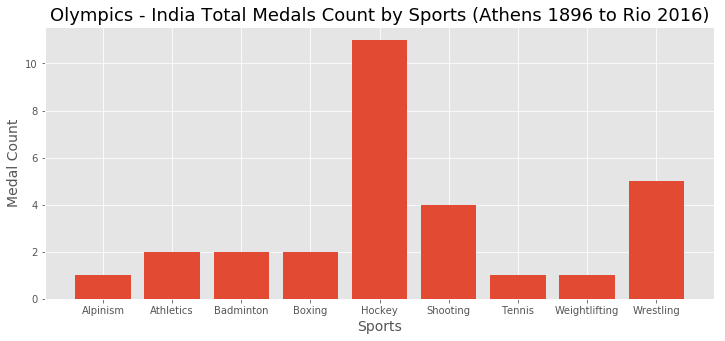

In [234]:
# plot with matplotlib

plt.figure(figsize=(12,5))
plt.bar( 'Sport', 'count', data=dfMedals, width=0.8)
plt.ylabel('Medal Count', fontsize=14)
plt.xlabel('Sports', fontsize=14)

plt.title('Olympics - India Total Medals Count by Sports (Athens 1896 to Rio 2016)', fontsize=18)

Text(0.5, 1.0, 'Olympics - India Gold Medals Count by Sports (Athens 1896 to Rio 2016)')

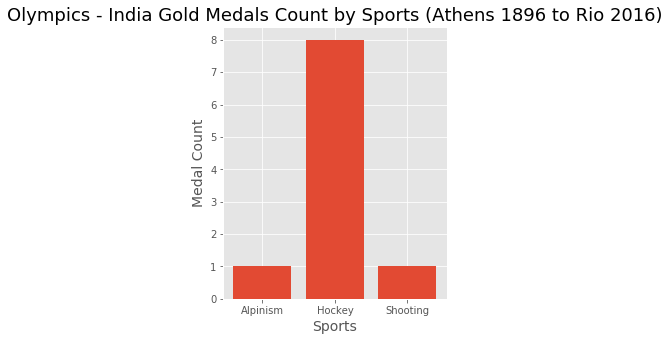

In [208]:
plt.figure(figsize=(4,5))
plt.bar( 'Sport', 'count', data=dfGoldMedals, width=0.8)
plt.ylabel('Medal Count', fontsize=14)
plt.xlabel('Sports', fontsize=14)

plt.title('Olympics - India Gold Medals Count by Sports (Athens 1896 to Rio 2016)', fontsize=18)

Text(0.5, 1.0, 'Olympics - India Medals Count by Years (Athens 1896 to Rio 2016)')

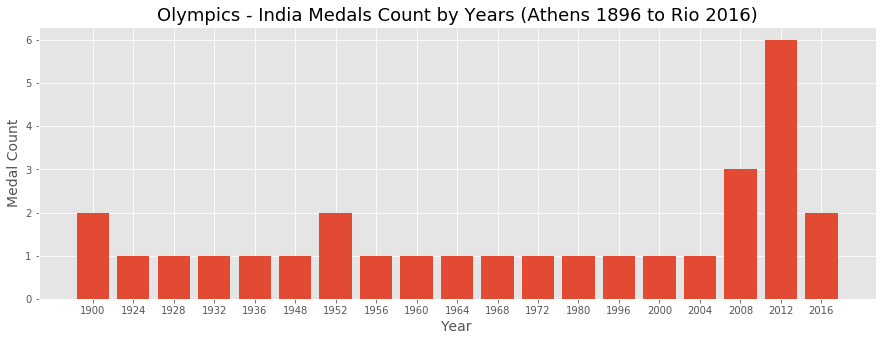

In [235]:
# plot with matplotlib

plt.figure(figsize=(15,5))
plt.bar( 'Year', 'count', data=dfMedalsByYears, width=0.8)
plt.ylabel('Medal Count', fontsize=14)
plt.xlabel('Year', fontsize=14)

plt.title('Olympics - India Medals Count by Years (Athens 1896 to Rio 2016)', fontsize=18)

Text(0.5, 1.0, 'Olympics - India Medals Count by Types (Athens 1896 to Rio 2016)')

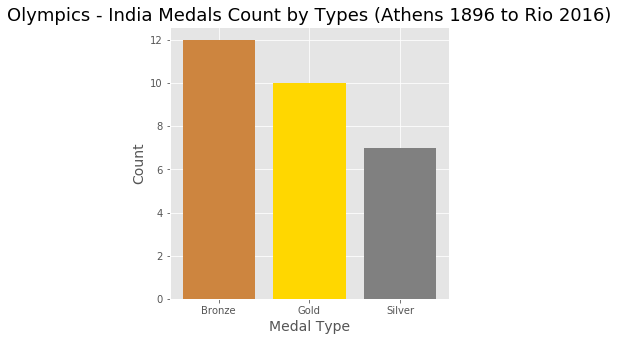

In [236]:
# plot with matplotlib

plt.figure(figsize=(5,5))
plt.bar( 'Medal', 'count', data=dfMedalsCountByType, width=0.8, color=['peru','gold','grey'])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Medal Type', fontsize=14)

plt.title('Olympics - India Medals Count by Types (Athens 1896 to Rio 2016)', fontsize=18)

In [260]:
# Pakistan medals 
pakMedal = df[(df.NOC == "PAK")].sort_values(by=['Year', 'Name'], ascending=False)
pakMedal.loc[~ pakMedal.Medal.isnull()].groupby(["NOC", "Year", "Games", "Sport", "Event"]).agg({'Age' : ['min','max','count']})


Age  \
                                                                         min   
NOC Year Games       Sport     Event                                           
PAK 1956 1956 Summer Hockey    Hockey Men's Hockey                      18.0   
    1960 1960 Summer Hockey    Hockey Men's Hockey                      22.0   
                     Wrestling Wrestling Men's Welterweight, Freestyle  25.0   
    1964 1964 Summer Hockey    Hockey Men's Hockey                      20.0   
    1968 1968 Summer Hockey    Hockey Men's Hockey                      21.0   
    1972 1972 Summer Hockey    Hockey Men's Hockey                      18.0   
    1976 1976 Summer Hockey    Hockey Men's Hockey                      17.0   
    1984 1984 Summer Hockey    Hockey Men's Hockey                      19.0   
    1988 1988 Summer Boxing    Boxing Men's Middleweight                24.0   
    1992 1992 Summer Hockey    Hockey Men's Hockey                      19.0   

                                                                              \
                                                                         max   
NOC Year Games       Sport     Event                                           
PAK 1956 1956 Summer Hockey    Hockey Men's Hockey                      31.0   
    1960 1960 Summer Hockey    Hockey Men's Hockey                      38.0   
                     Wrestling Wrestling Men's Welterweight, Freestyle  25.0   
    1964 1964 Summer Hockey    Hockey Men's Hockey                      37.0   
    1968 1968 Summer Hockey    Hockey Men's Hockey                      34.0   
    1972 1972 Summer Hockey    Hockey Men's Hockey                      31.0   
    1976 1976 Summer Hockey    Hockey Men's Hockey                      29.0   
    1984 1984 Summer Hockey    Hockey Men's Hockey                      28.0   
    1988 1988 Summer Boxing    Boxing Men's Middleweight                24.0   
    1992 1992 Summer Hockey    Hockey Men's Hockey                      27.0   

                                                                              
                                                                       count  
NOC Year Games       Sport     Event                                          
PAK 1956 1956 Summer Hockey    Hockey Men's Hockey                        14  
    1960 1960 Summer Hockey    Hockey Men's Hockey                        13  
                     Wrestling Wrestling Men's Welterweight, Freestyle     1  
    1964 1964 Summer Hockey    Hockey Men's Hockey                        16  
    1968 1968 Summer Hockey    Hockey Men's Hockey                        13  
    1972 1972 Summer Hockey    Hockey Men's Hockey                        15  
    1976 1976 Summer Hockey    Hockey Men's Hockey                        16  
    1984 1984 Summer Hockey    Hockey Men's Hockey                        16  
    1988 1988 Summer Boxing    Boxing Men's Middleweight                   1  
    1992 1992 Summer Hockey    Hockey Men's Hockey                        16